In [18]:
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [19]:
# Load the GeoJSON file into a GeoDataFrame
geojson_path = 'sedgwick_TREX24.geojson'  # Replace with the path to your GeoJSON file
gdf = gpd.read_file(geojson_path)

# Check the first few rows of the data
gdf.head()

# Basic information about the GeoDataFrame
print("Basic Information about the GeoDataFrame:")
print(gdf.info())

# Basic statistics for the attribute columns
print("Basic Statistics for Attribute Columns:")
print(gdf.describe())

Basic Information about the GeoDataFrame:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        2 non-null      object  
 1   FolderPath  2 non-null      object  
 2   SymbolID    2 non-null      int32   
 3   AltMode     2 non-null      int32   
 4   Base        2 non-null      float64 
 5   Clamped     2 non-null      int32   
 6   Extruded    2 non-null      int32   
 7   Snippet     0 non-null      object  
 8   PopupInfo   0 non-null      object  
 9   Shape_Leng  2 non-null      float64 
 10  Shape_Area  2 non-null      float64 
 11  geometry    2 non-null      geometry
dtypes: float64(3), geometry(1), int32(4), object(4)
memory usage: 292.0+ bytes
None
Basic Statistics for Attribute Columns:
       SymbolID  AltMode  Base  Clamped  Extruded  Shape_Leng  Shape_Area
count       2.0      2.0   2.0      2.0       2.0    2.000000 

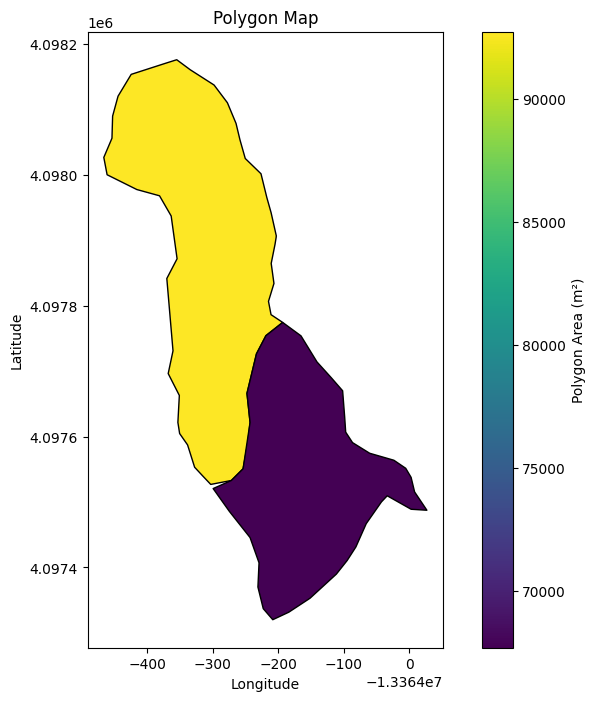

In [20]:
# Ensure the GeoDataFrame has a proper CRS (Coordinate Reference System)
if gdf.crs is None:
    print("Warning: The GeoDataFrame does not have a CRS. Assigning a default CRS.")
    gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)

# Reproject to a projected CRS (e.g., EPSG:3395 for meters)
gdf = gdf.to_crs(epsg=3395)

# Compute the area for each polygon (in square meters after reprojection)
gdf['area'] = gdf.geometry.area

# Plot the polygons using GeoPandas built-in plot function
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the polygons based on the 'area' column
gdf.plot(column='area', cmap='viridis', edgecolor='black', ax=ax)

# Add a colorbar to indicate the value associated with each color
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=gdf['area'].min(), vmax=gdf['area'].max()))
sm.set_array([])  # Empty array for colorbar
cbar = fig.colorbar(sm, ax=ax)  # Explicitly specify the axis for the colorbar
cbar.set_label('Polygon Area (m²)')

# Add labels to the plot (optional)
ax.set_title('Polygon Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot with labels
plt.show()